### Моделирование равномерного дискретного распределения

In [37]:
import numpy as np
import pandas as pd
from scipy.stats import randint

Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно 

(собственно, это как раз пример с пирожными)

In [38]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)

# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)

# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого x вероятность того, что случайная величина примет значение x или меньше:

In [39]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)
cdf

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

### Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.
Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [40]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)

# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)

# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)

# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


In [41]:
# если просто, то вероятность выиграть
p = 1/250
p

0.004

In [42]:
# Вероятность что выиграет кто-то из первых 50 зарегистрировавшихся
# Это сумма вероятностей каждого из этих пользователей
p * 50

0.2

### Распределение Бернулли, 
по сути, моделирует однократное подбрасывание «фальшивой» монеты. Это распределение вероятностей случайной величины, принимающей только два значения: 1 («успех») и 0 («неудача») с вероятностями p и p-1 

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

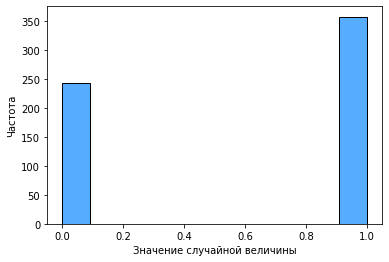

In [63]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=600, p=0.6)
ax = sns.histplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

Также можно вывести количество неудач и попаданий в нашей модели:

In [64]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 243]
 [  1 357]]


In [65]:
pd.DataFrame(data).value_counts()

1    357
0    243
Name: count, dtype: int64

### Биномиальным 
называют распределение, при котором возможны только два исхода (успех или неудача, выигрыш или проигрыш) и вероятность успеха и неудачи одинакова для всех испытаний. Однако исходы не обязательно должны быть равновероятными, и каждое испытание не зависит от других.

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

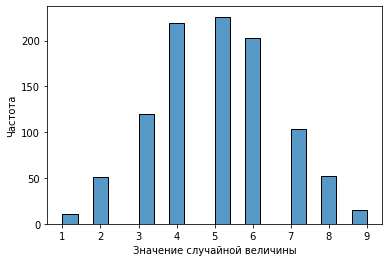

In [66]:
from numpy import random

x = random.binomial(n=10, p=0.5, size=1000)
ax = sns.histplot(x);
ax.set(xlabel='Значение случайной величины', ylabel='Частота');

In [67]:
n=100
p=0.25

In [68]:
(n * p * (1-p)) ** (1/2)

4.330127018922194

In [73]:
import scipy

scipy.stats.distributions.poisson.pmf(16, 4*4)

0.09921753162215541